1. a

In [2]:
import numpy as np

def cartesian_to_spherical(x, y, z):
    """
    Convert Cartesian (x, y, z) -> Spherical (r, theta, phi).
    Convention:
      r >= 0
      0 <= theta <= pi       (polar angle from z-axis)
      -pi < phi <= pi or 0 <= phi < 2*pi (azimuth in xy-plane)
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    # Handle the degenerate r=0 case separately if needed
    theta = np.arccos(z / r) if r != 0 else 0.0
    phi = np.arctan2(y, x)   # range is (-pi, pi]
    return r, theta, phi

def spherical_to_cartesian(r, theta, phi):
    """
    Convert Spherical (r, theta, phi) -> Cartesian (x, y, z).
    """
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def cartesian_to_cylindrical(x, y, z):
    """
    Convert Cartesian (x, y, z) -> Cylindrical (rho, phi, z).
    Convention:
      rho >= 0
      -pi < phi <= pi or 0 <= phi < 2*pi
    """
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)  # range is (-pi, pi]
    # z is the same
    return rho, phi, z

def cylindrical_to_cartesian(rho, phi, z):
    """
    Convert Cylindrical (rho, phi, z) -> Cartesian (x, y, z).
    """
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y, z

def spherical_to_cylindrical(r, theta, phi):
   
    # First to Cartesian, then to cylindrical
    x, y, z = spherical_to_cartesian(r, theta, phi)
    return cartesian_to_cylindrical(x, y, z)

def cylindrical_to_spherical(rho, phi, z):
   
    # First to Cartesian, then to spherical
    x, y, z = cylindrical_to_cartesian(rho, phi, z)
    return cartesian_to_spherical(x, y, z)

1. b

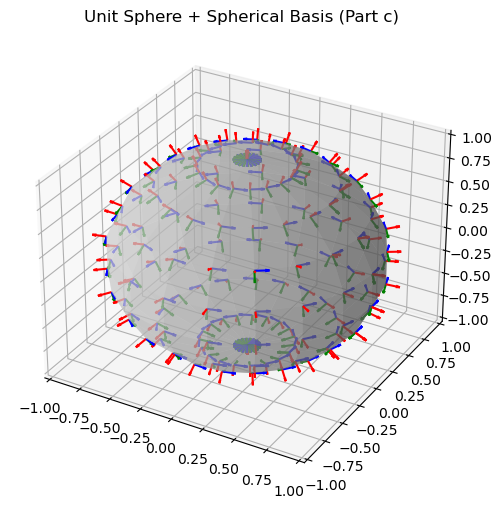

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure these remain functions and are NOT overwritten by arrays.
def e_r(theta, phi):
    return np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])

def e_theta(theta, phi):
    return np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
        -np.sin(theta)
    ])

def e_phi(theta, phi):
    return np.array([
        -np.sin(phi),
         np.cos(phi),
         0.0
    ])

def plot_sphere_in_spherical_basis():
   
    # Sample the entire sphere
    th_vals = np.linspace(0, np.pi, 10)
    ph_vals = np.linspace(0, 2*np.pi, 20)
    TH, PH  = np.meshgrid(th_vals, ph_vals)

    # Convert to Cartesian for surface
    X = np.sin(TH)*np.cos(PH)
    Y = np.sin(TH)*np.sin(PH)
    Z = np.cos(TH)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, color='lightgray', alpha=0.5, edgecolor='none')
    ax.set_title("Unit Sphere + Spherical Basis (Part c)")

    scale = 0.1
    rows, cols = TH.shape
    for i in range(rows):
        for j in range(cols):
            th = TH[i,j]
            ph = PH[i,j]
            pos = e_r(th, ph)       # point on sphere
            nr  = e_r(th, ph)       # normal (red)
            tth = e_theta(th, ph)   # tangent (green)
            tph = e_phi(th, ph)     # tangent (blue)

            ax.quiver(*pos, *(scale*nr),  color='r')  # e_r
            ax.quiver(*pos, *(scale*tth), color='g')  # e_theta
            ax.quiver(*pos, *(scale*tph), color='b')  # e_phi

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    plt.show()

# Usage in Jupyter:
# 1) Run this cell to define the functions.
plot_sphere_in_spherical_basis()

1. c

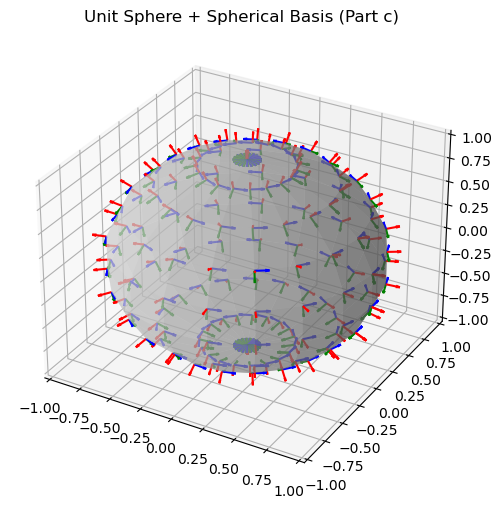

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def e_r(theta, phi):
    """
    Spherical basis vector e_r (outward normal on unit sphere).
    theta in [0, π], phi in [0, 2π].
    """
    return np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])

def e_theta(theta, phi):
    """
    Spherical basis vector e_θ (one tangent direction).
    """
    return np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
        -np.sin(theta)
    ])

def e_phi(theta, phi):
    """
    Spherical basis vector e_φ (other tangent direction).
    """
    return np.array([
        -np.sin(phi),
         np.cos(phi),
         0.0
    ])

def plot_sphere_in_spherical_basis():
    """
    (c) Plot the unit sphere and the spherical basis (e_r, e_theta, e_phi)
    at sample points. The vectors are color-coded:
      red   = e_r
      green = e_theta
      blue  = e_phi
    """
    # Sample entire sphere
    th_vals = np.linspace(0, np.pi, 10)
    ph_vals = np.linspace(0, 2*np.pi, 20)
    TH, PH = np.meshgrid(th_vals, ph_vals)

    # Convert to Cartesian for surface plotting
    X = np.sin(TH)*np.cos(PH)
    Y = np.sin(TH)*np.sin(PH)
    Z = np.cos(TH)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='lightgray', alpha=0.5, edgecolor='none')
    ax.set_title("Unit Sphere + Spherical Basis (Part c)")

    # At each (θ, φ), draw short quivers for e_r (red), e_theta (green), e_phi (blue).
    scale = 0.1
    rows, cols = TH.shape
    for i in range(rows):
        for j in range(cols):
            th = TH[i,j]
            ph = PH[i,j]
            pos = e_r(th, ph)       # point on sphere
            nr  = e_r(th, ph)       # normal
            tth = e_theta(th, ph)   # tangent
            tph = e_phi(th, ph)     # tangent
            ax.quiver(*pos, *(scale*nr),  color='r')
            ax.quiver(*pos, *(scale*tth), color='g')
            ax.quiver(*pos, *(scale*tph), color='b')

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    plt.show()

# Usage:
plot_sphere_in_spherical_basis()

1. d

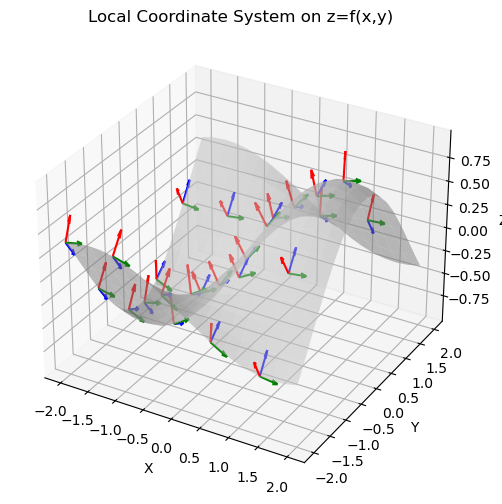

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def local_coord_surface(f, x_range=(-2,2), y_range=(-2,2), n=20):
    
    x_vals = np.linspace(*x_range, n)
    y_vals = np.linspace(*y_range, n)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    # approximate partial derivatives
    dZdx = np.gradient(Z, x_vals, axis=1)  # partial wrt x
    dZdy = np.gradient(Z, y_vals, axis=0)  # partial wrt y

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, color='lightgray', alpha=0.5, edgecolor='none')
    ax.set_title("Local Coordinate System on z=f(x,y)")

    skip = max(n//5, 1)
    for i in range(0, n, skip):
        for j in range(0, n, skip):
            px, py, pz = X[i,j], Y[i,j], Z[i,j]
            # Tangent vectors
            ex = np.array([1.0, 0.0, dZdx[i,j]])
            ey = np.array([0.0, 1.0, dZdy[i,j]])
            # Normal
            normal = np.cross(ex, ey)
            # Normalize them if desired
            ex /= (np.linalg.norm(ex)+1e-15)
            ey /= (np.linalg.norm(ey)+1e-15)
            norm_len = np.linalg.norm(normal)
            if norm_len>1e-12:
                normal /= norm_len

            scale = 0.3
            ax.quiver(px, py, pz, scale*ex[0], scale*ex[1], scale*ex[2], color='g')
            ax.quiver(px, py, pz, scale*ey[0], scale*ey[1], scale*ey[2], color='b')
            ax.quiver(px, py, pz, scale*normal[0], scale*normal[1], scale*normal[2], color='r')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# Example usage:
f = lambda X,Y: np.sin(X)*np.cos(Y)
local_coord_surface(f, x_range=(-2,2), y_range=(-2,2), n=20)

1. e

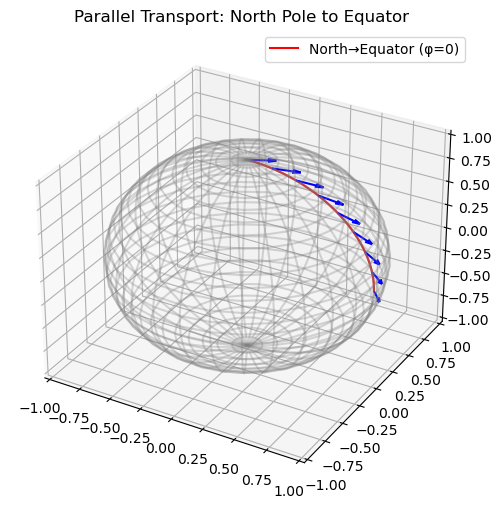

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Spherical basis on the unit sphere
def e_r(theta, phi):
    return np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])

def e_theta(theta, phi):
    return np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
        -np.sin(theta)
    ])

def e_phi(theta, phi):
    return np.array([
        -np.sin(phi),
         np.cos(phi),
         0.0
    ])

def parallel_transport_north_to_equator(alpha=1.0, beta=0.0, steps=50):
   
    thetas = np.linspace(0, np.pi/2, steps+1)
    # At (0,0), e_theta(0,0) = (1,0,0), e_phi(0,0) = (0,1,0).
    # initial vector n0 = alpha*(1,0,0) + beta*(0,1,0).
    # We'll re-normalize anyway.
    eθ_00 = e_theta(0,0)  # (1,0,0)
    eφ_00 = e_phi(0,0)    # (0,1,0)
    n0 = alpha*eθ_00 + beta*eφ_00
    n0 /= np.linalg.norm(n0)

    positions = []
    vectors   = []
    current_v = n0.copy()

    for θ in thetas:
        pos = e_r(θ, 0.0)  # position on sphere
        # remove normal component from current_v
        dotn = np.dot(current_v, pos)
        current_v = current_v - dotn*pos
        norm_v = np.linalg.norm(current_v)
        if norm_v>1e-12:
            current_v /= norm_v

        positions.append(pos)
        vectors.append(current_v.copy())

    return thetas, np.array(positions), np.array(vectors)

def plot_transport_north_to_equator(alpha=1.0, beta=0.0, steps=50):
   
    thetas, pts, vecs = parallel_transport_north_to_equator(alpha, beta, steps)

    fig = plt.figure(figsize=(8,6))
    ax  = fig.add_subplot(projection='3d')

    # Wireframe sphere for context
    u = np.linspace(0, np.pi, 30)
    v = np.linspace(0, 2*np.pi, 30)
    U, V = np.meshgrid(u, v)
    SX = np.sin(U)*np.cos(V)
    SY = np.sin(U)*np.sin(V)
    SZ = np.cos(U)
    ax.plot_wireframe(SX, SY, SZ, color='gray', alpha=0.3)

    # Path + vectors
    ax.plot(pts[:,0], pts[:,1], pts[:,2], 'r-', label="North→Equator (φ=0)")
    skip = max(1, steps//8)
    for i in range(0, steps+1, skip):
        ax.quiver(pts[i,0], pts[i,1], pts[i,2],
                  vecs[i,0], vecs[i,1], vecs[i,2],
                  color='b', length=0.2)

    ax.set_title("Parallel Transport: North Pole to Equator")
    ax.legend()
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    plt.show()

# Example usage in a Jupyter cell:
plot_transport_north_to_equator(alpha=1.0, beta=0.5, steps=80)

1. f

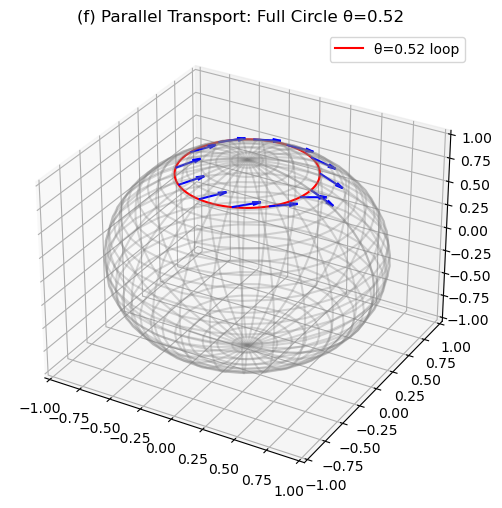

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def e_r(theta, phi):
    return np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])

def e_theta(theta, phi):
    return np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
        -np.sin(theta)
    ])

def e_phi(theta, phi):
    return np.array([
        -np.sin(phi),
         np.cos(phi),
         0.0
    ])

def parallel_transport_circle(theta0=np.pi/4, steps=100):
  
    ph_vals = np.linspace(0, 2*np.pi, steps, endpoint=False)

    # initial vector: e_theta at φ=0
    v = e_theta(theta0, 0)
    v /= np.linalg.norm(v)

    points = []
    vectors= []

    for phi in ph_vals:
        pos = e_r(theta0, phi)  # on sphere
        # remove normal component
        dotn = np.dot(v, pos)
        v = v - dotn*pos
        normv = np.linalg.norm(v)
        if normv>1e-12:
            v /= normv

        points.append(pos)
        vectors.append(v.copy())

    return np.array(points), np.array(vectors)

def plot_transport_circle(theta0=np.pi/4, steps=100):
   
    pts, vecs = parallel_transport_circle(theta0, steps)

    fig = plt.figure(figsize=(8,6))
    ax  = fig.add_subplot(projection='3d')

    # Wireframe sphere
    u = np.linspace(0, np.pi, 30)
    w = np.linspace(0, 2*np.pi, 30)
    U, W = np.meshgrid(u, w)
    SX = np.sin(U)*np.cos(W)
    SY = np.sin(U)*np.sin(W)
    SZ = np.cos(U)
    ax.plot_wireframe(SX, SY, SZ, color='gray', alpha=0.3)

    # Circle + quivers
    ax.plot(pts[:,0], pts[:,1], pts[:,2], 'r-', label=f"θ={theta0:.2f} loop")
    skip = max(1, steps//12)
    ax.quiver(pts[::skip,0], pts[::skip,1], pts[::skip,2],
              vecs[::skip,0], vecs[::skip,1], vecs[::skip,2],
              length=0.2, color='b')

    ax.set_title(f"(f) Parallel Transport: Full Circle θ={theta0:.2f}")
    ax.legend()
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    plt.show()

# Example usage in Jupyter:
plot_transport_circle(theta0=np.pi/6, steps=100)

1. g

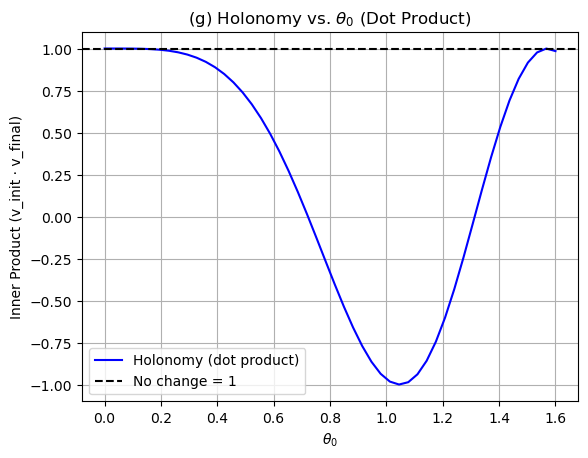

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse parallel_transport_circle from part (f), or rename if needed.
# For reference:
def e_r(theta, phi):
    return np.array([
        np.sin(theta)*np.cos(phi),
        np.sin(theta)*np.sin(phi),
        np.cos(theta)
    ])
def e_theta(theta, phi):
    return np.array([
        np.cos(theta)*np.cos(phi),
        np.cos(theta)*np.sin(phi),
        -np.sin(theta)
    ])
def e_phi(theta, phi):
    return np.array([
        -np.sin(phi),
         np.cos(phi),
         0.0
    ])

def parallel_transport_circle(theta0, steps=100):
    ph_vals = np.linspace(0, 2*np.pi, steps, endpoint=False)
    # initial vector v_init = e_theta(theta0, 0)
    v = e_theta(theta0, 0)
    v /= np.linalg.norm(v)
    points = []
    vectors= []
    for phi in ph_vals:
        pos = e_r(theta0, phi)
        dotn= np.dot(v, pos)
        v   = v - dotn*pos
        nrm = np.linalg.norm(v)
        if nrm>1e-12:
            v /= nrm
        points.append(pos)
        vectors.append(v.copy())
    return np.array(points), np.array(vectors)

def measure_holonomy_dot(theta0, steps=100):
  
    pts, vecs = parallel_transport_circle(theta0, steps)
    v_init  = vecs[0]
    v_final = vecs[-1]
    return np.dot(v_init, v_final)

def plot_holonomy_dot(n=50, steps=200, tmax=np.pi):
   
    thetas = np.linspace(0, tmax, n)
    dots   = []
    for t0 in thetas:
        val = measure_holonomy_dot(t0, steps)
        dots.append(val)

    plt.figure()
    plt.plot(thetas, dots, 'b-', label="Holonomy (dot product)")
    plt.axhline(1.0, color='k', linestyle='--', label="No change = 1")
    plt.xlabel(r"$\theta_0$")
    plt.ylabel("Inner Product (v_init · v_final)")
    plt.title("(g) Holonomy vs. $\\theta_0$ (Dot Product)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage:
plot_holonomy_dot(n=50, steps=200, tmax=1.6)